In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

house_df = pd.read_csv('kc_house_data.csv')

## 1. Linear Regression. A bit of formalism

Let's have a data consisting of $n$ samples. These samples are $(m+1)$ - dimensional vectors, where first $m$ dimensions are called features (explanatory variables) and will be used to predict the last dimension which is called regressand (dependent variable). 

We will have therefore a $n \times m$ matrix **$X$** (called feature matrix) and vector **$y$** of lenght $n$. 

In our simple example, living squarefeet is a feature, house's price is regressand and the data consists of $100$ samples. It forms $100 \times 1$ feature matrix **$X$** and vector **$y$** of length $100$.

In [2]:
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]
print(np.shape(X))
print(np.shape(y))

(100, 1)
(100, 1)


Linear regression approach tries to find a vector **$b$** which minimizes the cost function 

$$f_{y}(b) = \dfrac{|Xb - y|^2}{n}, $$

where **$|\cdot|$** is euclidean norm and **$Xb$** is simple matrix multiplication (vector is also a matrix). 

Geometrically (and roughly) speaking, we are determining a line which minimizes the cumulative distance to all the points. 

When such a vector **$b$** is found, we can predict values **$y$** for given features **$X$** by calculating **$Xb$**. We have therefore 

$$y_{pred} = Xb, \\ f_{y}(b) = \dfrac{|y_{pred} - y|^2}{n}. $$

## Exercise 1
a) Create functions *predict(b, X)* and *cost(y_pred, y_true)* implementing theory above.  All inputs should be numpy arrays (take care of dimension scalability!)  
b) For our data **$X,y$**, plot cost as the function of **$b$** (which is one dimensional vector). Plot the line with best slope among  evaluated with *cost* function.

In [3]:
#a)
def predict(b, X):
    return np.dot(X, b)

def cost(y_pred, y_true):
    norm = np.linalg.norm(y_pred - y_true)
    cost = (norm**2)/(len(y_pred))
    return np.round(cost, 2)

#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(predict(test_b, test_X))
print(cost(predict(test_b, test_X),test_y))

[[ 6]
 [11]
 [12]
 [16]]
82.75


### Comment
There is not much to discuss here as it is just an implementation of the theory presented above. In the predict function, we calculate the product of the matrix and the minimizing one. This function, once we have a minimizing vector, will be used to predict the value. In the cost function, however, we calculate the cost of such a prediction as the Euclidean norm from the difference of what we got from the prediction and the actual value. We will use this function to find the minimizing vector.

Best b1 is [246]
Error for besr b1 is [53150098556.45]


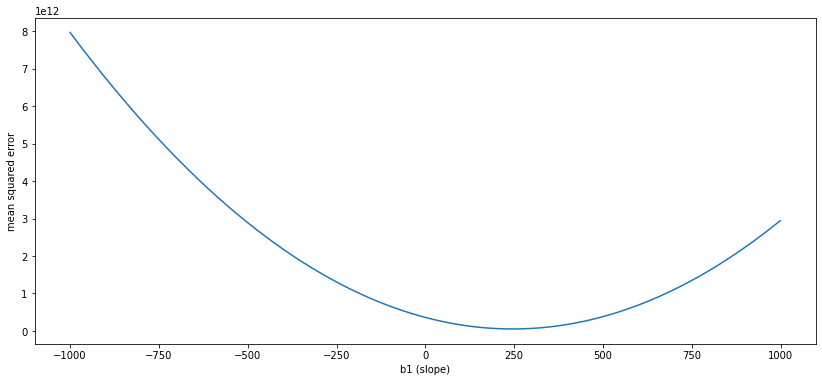

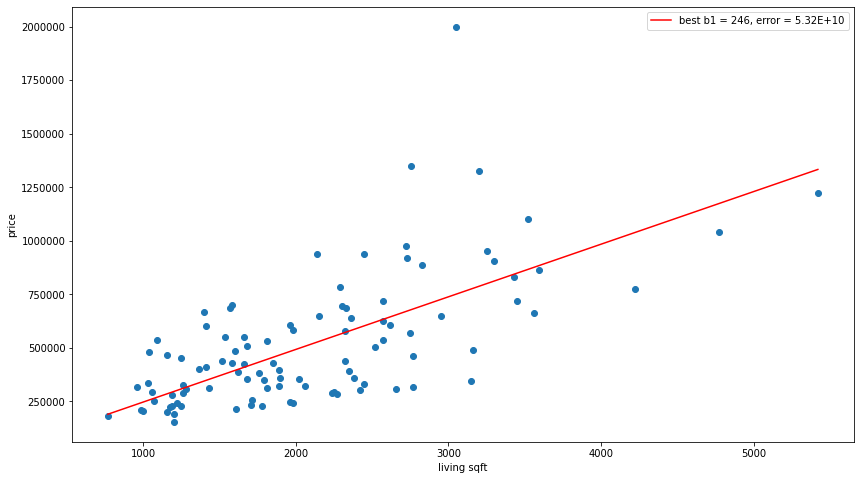

In [4]:
#b)
slope = list(range(-1000, 1000))
errors = [cost(predict([[i]], X), y) for i in slope]

plt.figure(figsize=(14, 6))
plt.xlabel('b1 (slope)')
plt.ylabel('mean squared error')
plt.plot(slope, errors)
    
min_error = min(errors)
b1 = slope[np.where(errors == min_error)[0][0]]

print(f"Best b1 is [{b1}]")
print(f"Error for besr b1 is [{min_error}]")
    
plt.figure(figsize=(14, 8))
plt.ticklabel_format(axis="y", style='plain')
plt.xlabel("living sqft")
plt.ylabel("price")
plt.scatter(X, y)
x_new = np.arange(X.min(), X.max(), 1)
plt.plot(x_new, x_new * b1, c="r", label=f"best b1 = {b1}, error = {min_error:.2E}")
plt.legend()

### Comment
In this problem, we were looking for a value that would generate the best slopes for our data. We did this by choosing the slope where the error was the smallest. Looking at the graph showing the cost function, we can conclude that the search for the minimum cost in such a given interval could be improved by selecting the steps by which we would move to count the smallest error and strive for it.

Regression coefficient y versus x (slope) [[[230.21757104]]]
Mean squared error equals: [52939144389.84444]


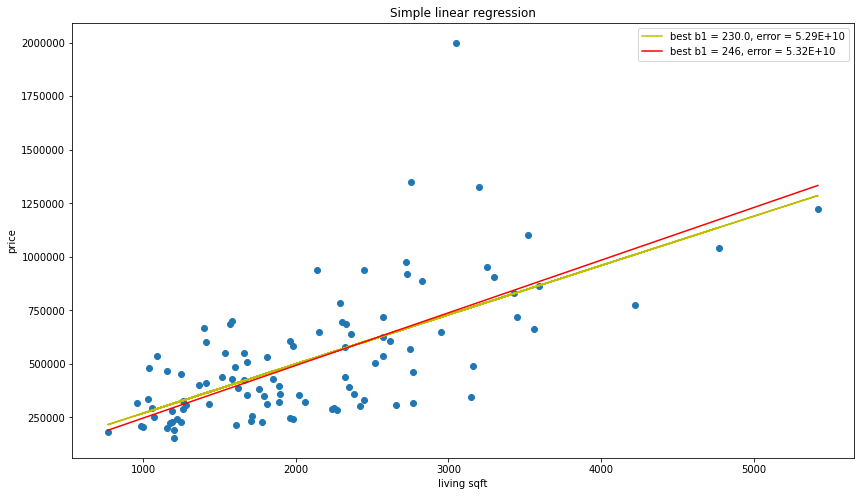

In [5]:
model = LinearRegression() 
model.fit(X, y)

print(f"Regression coefficient y versus x (slope) [{model.coef_}]")

prediction = model.predict(X)
error = mean_squared_error(y, prediction)
print(f"Mean squared error equals: [{error}]")

plt.figure(figsize=(14, 8))
plt.ticklabel_format(axis="y", style='plain')
plt.xlabel('living sqft')
plt.ylabel('price')
plt.title('Simple linear regression')
plt.scatter(X, y)
plt.plot(X, prediction, c='y', label=f"best b1 = {np.round(model.coef_[0][0])}, error = {error:.2E}")
plt.plot(x_new, x_new * b1, c="r", label=f"best b1 = {b1}, error = {min_error:.2E}")
plt.legend()

### Comment
In addition, here I made a comparison of our prediction results and the results of predictions using the functions built into the library that we used in the previous set. The result I saw surprised me, I did not expect that the values would be so similar and the error similar. Thanks to this, we can sometimes assume that the implementation of the function is very similar in concept to our theoretical calculations.

# 2. Bias

The line above has limitation of crossing point (0,0). As on our data it doesn't seem harmful, let us check how our model would perform, if all $y$ were shifted by some constant. The interpretation is as follows: the goverment has imposed a new tax in the set amount of 1 million dollar on buying new houses.

Best b1 is [656]
Error for besr b1 is [208030959040.45]


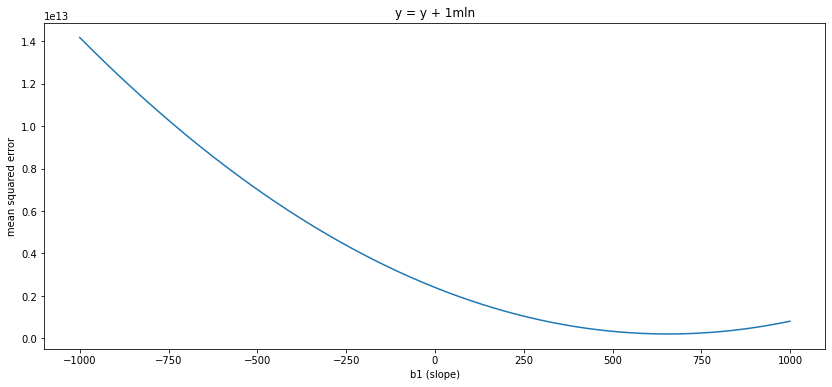

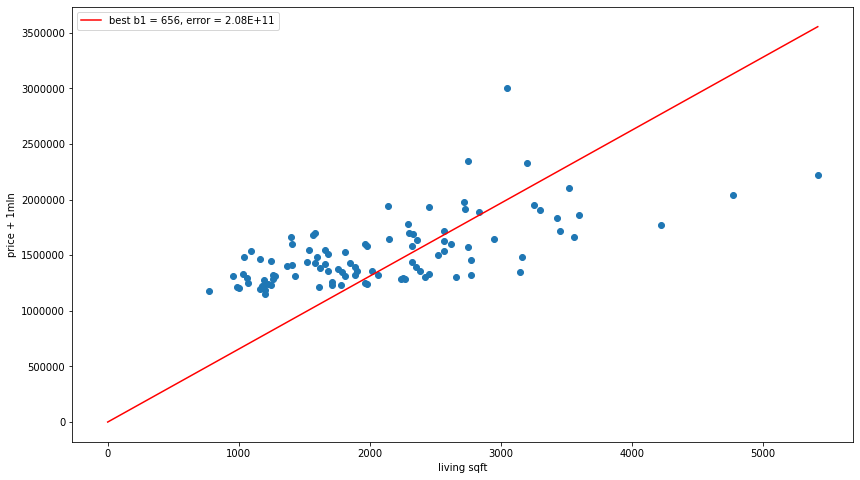

In [6]:
y_shifted = y + 1e6
errors = [cost(predict([[i]], X), y_shifted) for i in slope]

plt.figure(figsize=(14, 6))
plt.title("y = y + 1mln")
plt.xlabel('b1 (slope)')
plt.ylabel('mean squared error')
plt.plot(slope, errors)
    
min_error = min(errors)
b1 = slope[np.where(errors == min_error)[0][0]]

print(f"Best b1 is [{b1}]")
print(f"Error for besr b1 is [{min_error}]")
    
plt.figure(figsize=(14, 8))
plt.ticklabel_format(axis="y", style='plain')
plt.xlabel("living sqft")
plt.ylabel("price + 1mln")
plt.scatter(X, y_shifted)
x_new = np.arange(0, X.max(), 1)
plt.plot(x_new, x_new * b1, c="r", label=f"best b1 = {b1}, error = {min_error:.2E}")
plt.legend()

As we can see, for the best slope the error has grown almost by the factor of four. In addition we clearly see, that what limits us is indeed the constraint of all lines crossing point $(0,0)$.   

There are two basic solutions of this problem. One of them is centring of the data, that is substracting overall mean from all the values of given feature (or regressand).  

The other is adding bias term, which in this context (different than context discussed during the lectures!) may be understood as constant term in line equation. We simulate adding constant term to result of each prediction by appending artificial feature consisting of ones to **$X$** matrix and additional term to **$b$** vector.

## Exercise 2
a) Add bias column to the **$X$** matrix.  
b) Make the code below compatible with functions that you've created so far.

In [7]:
#a)
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]


bias = np.ones(X.shape[0]).reshape(-1,1)
X = np.append(X, bias, axis=1)

### Comment
Without the intercept in our linear regression function, we can never find an approximation that doesn't go through (0, 0), so we're very limited by that. In the steps above, I added a second vector to our "vector" X that will allow us to go through different y's at x=0.

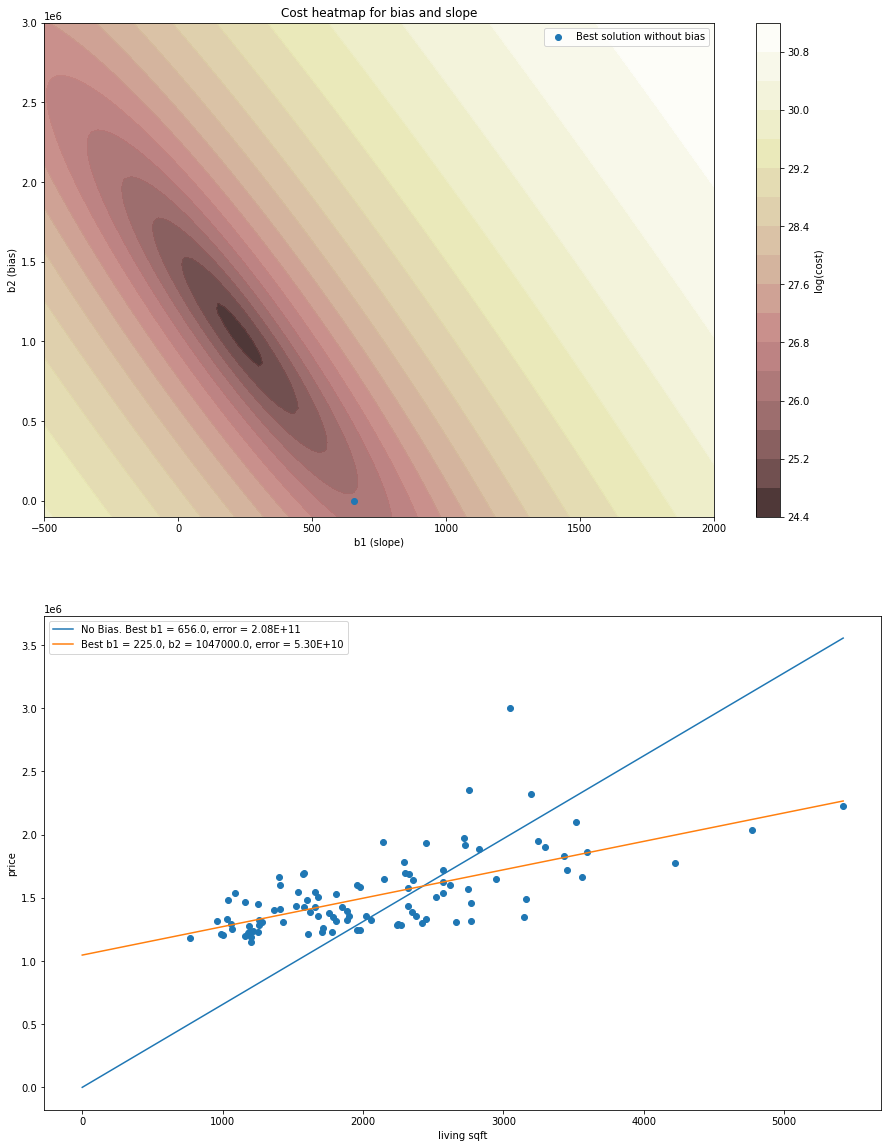

In [8]:
#b)
y_shifted = y+1e6

#No Bias Part
b_arr = [np.array([[b1]]) for b1 in np.linspace(-1000, 1000, num=2001)]
cost_arr = [cost(predict(b, X[:, 0].reshape(-1, 1)), y_shifted) for b in b_arr]
best_b1 = b_arr[np.argmin(cost_arr)][0][0]

#Bias Part
nb_of_bs = 101 # compute the cost nb_of_bs times in each dimension
b1 = np.linspace(-500, 2000, num=nb_of_bs) # slope coefficient
b2 = np.linspace(-1e5, 3e6, num=nb_of_bs) # bias
b_x, b_y = np.meshgrid(b1, b2) # generate grid
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs)) # initialize cost matrix

# Fill the cost matrix for each combination of coefficients
for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_shifted)
        
plt.figure(figsize=(15,20)) 
        
plt.subplot(2,1,1)
plt.title("Cost heatmap for bias and slope")

plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()
plt.scatter(best_b1, 0, label = "Best solution without bias")
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

plt.subplot(2,1,2)

plt.scatter(X.T[0], y_shifted)
plt.xlabel("living sqft")
plt.ylabel("price")

x_model = np.linspace(np.min(X), np.max(X), 1000)
y_model = best_b1*x_model
plt.plot(x_model, y_model, label='No Bias. Best b1 = {}, error = {:.2E}'.format(best_b1, cost_arr[np.argmin(cost_arr)]))

best_b1_2d_ind, best_b2_2d_ind = np.unravel_index(cost_arr_2d.argmin(), cost_arr_2d.shape)
best_b1 = b_x[best_b1_2d_ind,best_b2_2d_ind]
best_b2 = b_y[best_b1_2d_ind,best_b2_2d_ind]

y_model = best_b1*x_model + best_b2
plt.plot(x_model, y_model, label='Best b1 = {}, b2 = {}, error = {:.2E}'.format(best_b1, best_b2, cost_arr_2d[best_b1_2d_ind,best_b2_2d_ind]))

plt.legend()

plt.show()

**Adding bias improved error by three orders of magnitude. Not bad!**

### Comment about the changes
The changes made to the code were due to noticing inconsistencies between the best slope result in the introduction to this chapter and the result of the same value in the charts above. I found that in the part of calculating the cost without bias, instead of [[value]], [value] was passed to the function, which resulted in different results.

### Comment
On the contour plot we projected our cost function onto the plane and here we can easily see that the solution found without using bias is far from the best one.

Below in the graph, we can see a better fit of our function with bias where the error is much smaller than without bias.

# 3. Standardization

In order to improve performance of many machine learning algorithms, the value standardization is applied. It makes the values of each feature in the data have zero-mean and unit-variance. It is achieved by substracting from each value $x$ the overall mean $\bar{x}$, and then dividing it by feature's standard deviation ${\sigma}$:

$$x' = \frac{x - \bar{x}}{\sigma}. $$

It is important to remember, that bias column should not be standardize!

## Exercise 3
a) Implement function standardize(), which standardize the feature matrix and returns it together with two vectors containing original features' means and standard deviations.  
b) Implement function destandardize(), which restores the original data given standardized feature matrix X and vectors containing original features' means and standard deviations.  
c) Plot original $X,y$ data. Then plot it after standardization. Then plot it after destandardisation.

In [9]:
#a)
def standardize(X):
    means = np.mean(X, axis=0)
    sds = np.std(X, axis=0)
    return (X - means) / sds, means, sds

#b)
def destandardize(X, means, sds):
    return (X * sds) + means


#short test:
W = [[1,2,3],[2,5,4],[3,4,5],[4,5,7]]
standardize(W)

(array([[-1.34164079, -1.63299316, -1.18321596],
        [-0.4472136 ,  0.81649658, -0.50709255],
        [ 0.4472136 ,  0.        ,  0.16903085],
        [ 1.34164079,  0.81649658,  1.52127766]]),
 array([2.5 , 4.  , 4.75]),
 array([1.11803399, 1.22474487, 1.47901995]))

### Comment
In the task above, I have prepared two functions. The first for data standardization and the second for de-standardization. We standardize the data to get a new variable with a mean expected value of 0 and a standard deviation of 1.

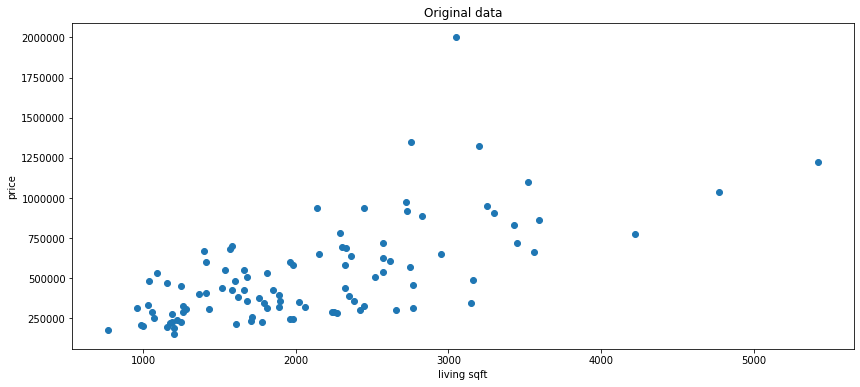

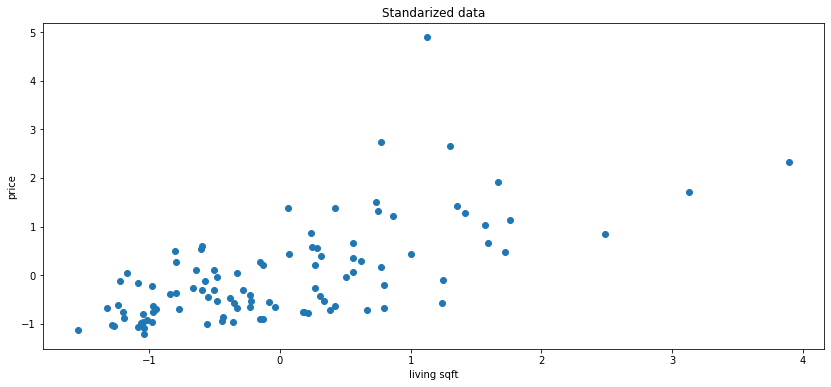

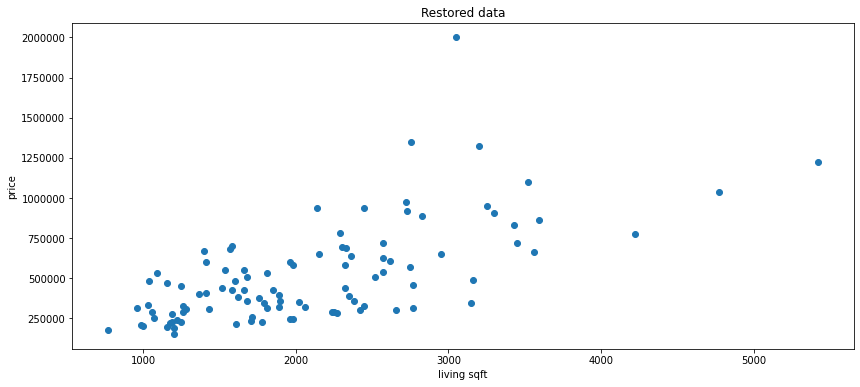

In [10]:
#c)
plt.figure(figsize=(14, 6))
plt.ticklabel_format(axis="y", style='plain')
plt.title("Original data")
plt.xlabel('living sqft')
plt.ylabel('price')
plt.scatter(X[:, 0], y)

X_standarized, X_means, X_sds = standardize(X[:, 0])
y_standarized, y_means, y_sds = standardize(y)

plt.figure(figsize=(14, 6))
plt.title("Standarized data")
plt.xlabel('living sqft')
plt.ylabel('price')
plt.scatter(X_standarized, y_standarized)

plt.figure(figsize=(14, 6))
plt.ticklabel_format(axis="y", style='plain')
plt.title("Restored data")
plt.xlabel('living sqft')
plt.ylabel('price')
plt.scatter(destandardize(X_standarized, X_means, X_sds), destandardize(y_standarized, y_means, y_sds))

### Comment
As we can see from the graphs above, the standardization did not change the arrangement of the points or cause the proportions between them to change. The only visible change is the data scale change. 

The reverse operation restores the data, in the ideal model it would be a lossless process, but in the IT model the results will certainly be affected by rounding errors.

## 3. Gradient Descent Method

In previous examples we were determining the approximate value of optimal vector **$b$** by finding best arguments from pre-defined grid. This solution is neither fast nor precise. Although in theory it is possible to find vector **$b$** analytically, it requires inversing large matrices, as the close form for **$b$** is $b=(X^\mathsf{T}X)^{-1}X^\mathsf{T}y$.

The other approach is to find approximation of **$b$** is Gradient Descent Method. Let us recall that for function $f: \ R^n \to R$ a gradient 

$$\nabla f =  \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

is the direction of the biggest increase of $f$. Using linearity of derivative, $-\nabla f$ is the direction of the biggest decrease. Gradient Descent Method is based on iterative moving in the direction opposite to gradient, and by these means approaching the minimum.

#### GDM step by step:  
1. Choose starting point $x_{0}$ and parameters: *learning rate* and *precision*,
2. Update $x_{i+1} = x_{i} - \nabla f(x_{i})\cdot lr$, where $lr$ is learning rate parameter,
3. If $(|\nabla f(x_{i})| < precision)$, end. If not, go back to point 2.

One of many limitations of GMD may be knowledge of function's gradient. Luckily for us, it is quite easy in case of linear regression with mean square error cost function. We have

$$ \nabla f_{y}(b) = \nabla\dfrac{|Xb−y|^2}{n} = \dfrac{2X^\mathsf{T}(Xb−y)}{n}.  $$

## Exercise 4
a) Create functions: *gradient()* which computes gradient for linear regresion and *gradient_descent_step()* which returns new vector **b** being the result of one GDM step.  

b) Take **$X$** consisting of *sqft_living* together with bias column. Set **$y$** as price. Standardize both **$X$** (without bias) and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 2 \end{bmatrix}$**. Experiment with other *learning rates*.  

c) Take **$X$** consisting of *sqft_living* and *sqft_lot*. Set **$y$** as price. Standardize both **$X$** and **$y$**. Plot a heatmap showing dependence of cost function's value on vector **$b$**. Mark first 5 steps of gradient descent with *learning rate* = $0.2$, starting from **$b =  \begin{bmatrix} 3 \\ 1 \end{bmatrix}$**. Experiment with other *learning rates*.  

d) Try to redo above points without standarization. How can you explain such results?


In [11]:
#a)

def gradient(b, X, y):
    return np.dot(2 * X.T, np.dot(X, b) - y) / len(y)

def gradient_descent_step(b, X, y, lr):
    return b - gradient(b, X, y) * lr

def gradient_descent(b, X, y, lr, step):
    gradients = [b]
    for i in range(0, step):
        b = gradient_descent_step(gradients[i], X, y, lr)
        gradients.append(b)
    return gradients


#short test:
test_b = np.array([[1],[1],[1]])
test_X = np.array([[1,2,3],[2,5,4],[3,4,5],[4,5,7]])
test_y = np.array([[1],[2],[3],[4]])

print(gradient(test_b, test_X, test_y))
print(gradient_descent_step(test_b, test_X, test_y, 0.1))

[[49. ]
 [75.5]
 [90. ]]
[[-3.9 ]
 [-6.55]
 [-8.  ]]


### Comment
The gradient descent method is an iterative method, which takes up much less memory because we operate all the time on this vector b, modifying only its values. Only matrix multiplication and transpositions are the most expensive, but even our function can be optimized to only transpose once because X does not change.

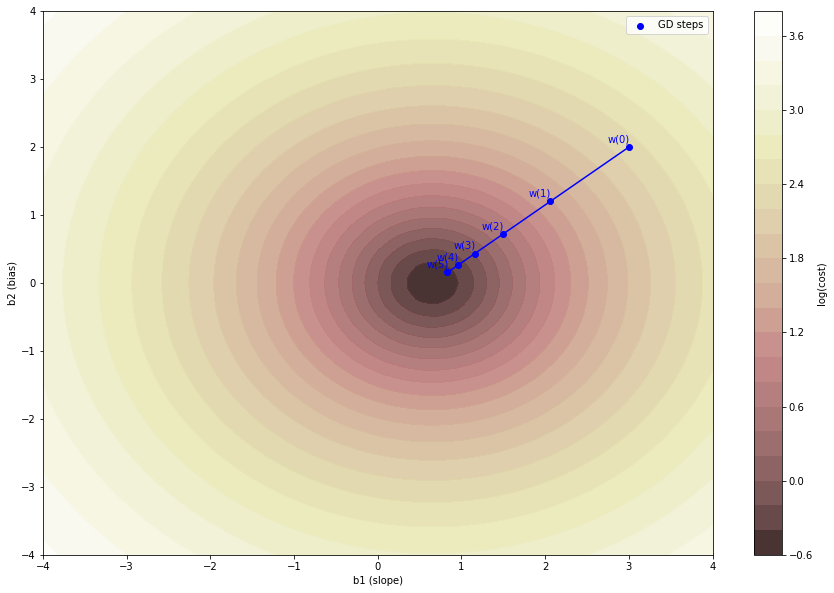

In [12]:
#b)
X_no_bias_stand = standardize(X[:, 0])[0]
X[:, 0] = X_no_bias_stand
y_std = standardize(y)[0]

nb_of_bs = 101 
b1 = np.linspace(-4, 4, num=nb_of_bs)
b2 = np.linspace(-4, 4, num=nb_of_bs)
b_x, b_y = np.meshgrid(b1, b2)
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs))

for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y_std)

plt.figure(figsize=(15, 10)) 
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()        

b = np.array([[3.], [2.]])
lr = 0.2
gradients = np.array(gradient_descent(b, X, y_std, lr, 5))

labels = ['w(0)', 'w(1)', 'w(2)', 'w(3)', 'w(4)', 'w(5)']

plt.plot(gradients[:, 0], gradients[:, 1], c='b')
plt.scatter(gradients[:, 0], gradients[:, 1], label='GD steps', c='b')

for i, txt in enumerate(labels):
    plt.annotate(txt, (gradients[:, 0][i], gradients[:, 1][i]), 
                 xycoords='data', xytext=(-10, 3), 
                 textcoords='offset points', 
                 ha="center", va="bottom", 
                 color="blue")
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

### Comment
As we can see, this method allows you to move towards the minimum in a small number of steps.

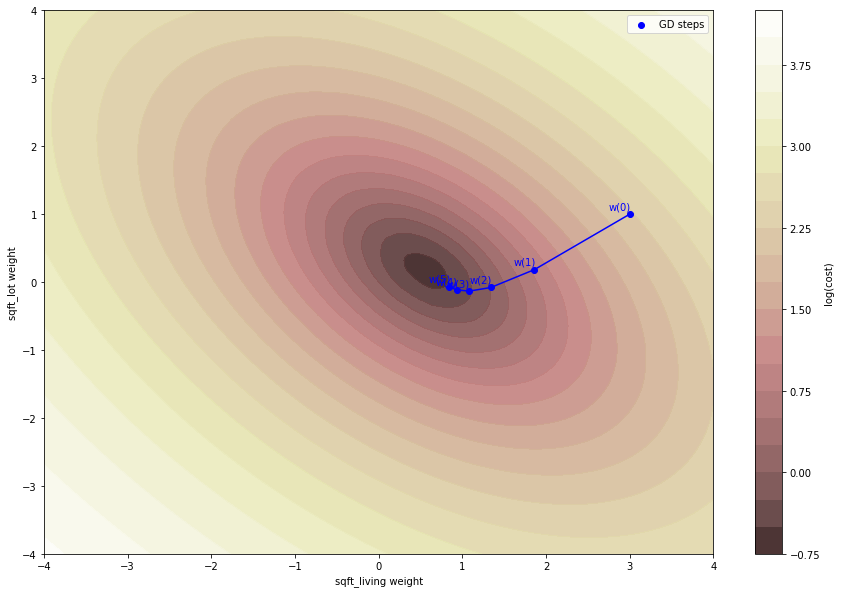

In [13]:
#c)
X = house_df[['sqft_living', 'sqft_lot']].values.reshape(-1, 2)[:100]
y = house_df.price.values.reshape(-1,1)[:100]
X_standarized, X_means, X_sds = standardize(X)
y_standarized, y_means, y_sds = standardize(y)

nb_of_bs = 101 
b1 = np.linspace(-4, 4, num=nb_of_bs)
b2 = np.linspace(-4, 4, num=nb_of_bs)
b_x, b_y = np.meshgrid(b1, b2)
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs))

for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X_standarized) , y_standarized)

plt.figure(figsize=(15, 10)) 
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()        

b = np.array([[3.], [1.]])
lr = 0.2
gradients = np.array(gradient_descent(b, X_standarized, y_standarized, lr, 5))

labels = ['w(0)', 'w(1)', 'w(2)', 'w(3)', 'w(4)', 'w(5)']

plt.plot(gradients[:, 0], gradients[:, 1], c='b')
plt.scatter(gradients[:, 0], gradients[:, 1], label='GD steps', c='b')

for i, txt in enumerate(labels):
    plt.annotate(txt, (gradients[:, 0][i], gradients[:, 1][i]), 
                 xycoords='data', xytext=(-10, 3), 
                 textcoords='offset points', 
                 ha="center", va="bottom", 
                 color="blue")
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("sqft_living weight")
plt.ylabel("sqft_lot weight")
plt.legend()

### Comment
This method also allows you to search for the minimum in the case of many variables.

When we choose a learning rate that is too small, our journey towards the minimum is slow. And when we choose too big, we "jump" over the minimum, which also causes slow moving towards it.

6 first steps of gradient descent method
 [[ 3.00000000e+00  2.00000000e+00]
 [ 4.95136269e+08  2.05154476e+05]
 [-1.00925745e+15 -4.13680080e+11]
 [ 2.05721370e+21  8.43222244e+17]
 [-4.19330883e+27 -1.71877685e+24]
 [ 8.54740516e+33  3.50345818e+30]]


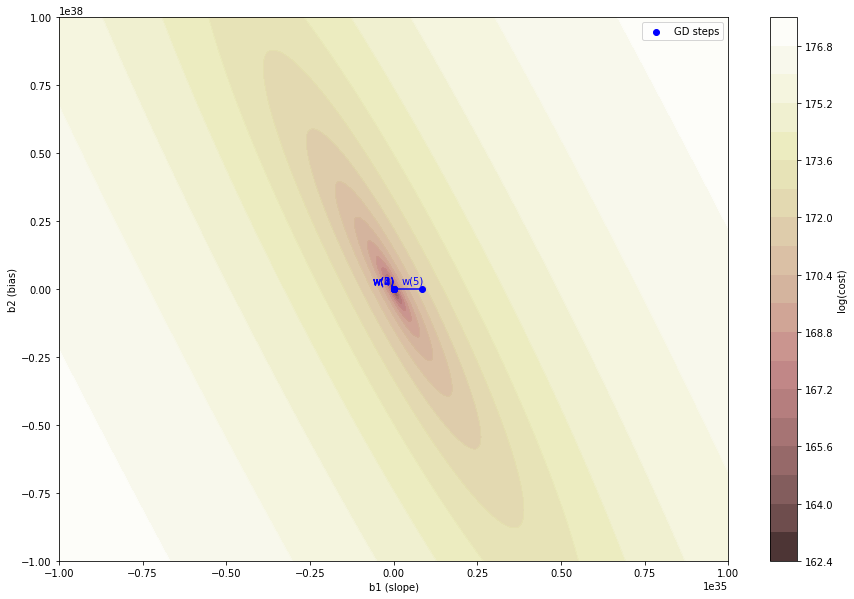

In [14]:
#d)
X = house_df.sqft_living.values.reshape(-1,1)[:100]
y = house_df.price.values.reshape(-1,1)[:100]
bias = np.ones(X.shape[0]).reshape(-1,1)
X = np.append(X, bias, axis=1)

nb_of_bs = 500
b1 = np.linspace(-1e35, 1e35, num=nb_of_bs)
b2 = np.linspace(-1e38, 1e38, num=nb_of_bs)
b_x, b_y = np.meshgrid(b1, b2)
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs))

for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y)

plt.figure(figsize=(15, 10)) 
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()        

b = np.array([[3.], [2.]])
lr = 0.2
gradients = np.array(gradient_descent(b, X, y, lr, 5))

labels = ['w(0)', 'w(1)', 'w(2)', 'w(3)', 'w(4)', 'w(5)']

plt.plot(gradients[:, 0], gradients[:, 1], c='b')
plt.scatter(gradients[:, 0], gradients[:, 1], label='GD steps', c='b')

for i, txt in enumerate(labels):
    plt.annotate(txt, (gradients[:, 0][i], gradients[:, 1][i]), 
                 xycoords='data', xytext=(-10, 3), 
                 textcoords='offset points', 
                 ha="center", va="bottom", 
                 color="blue")
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("b1 (slope)")
plt.ylabel("b2 (bias)")
plt.legend()

print("6 first steps of gradient descent method\n" ,gradients.reshape(-1, 2))

6 first steps of gradient descent method
 [[ 3.00000000e+00  1.00000000e+00]
 [ 4.82826137e+08  3.06488163e+09]
 [-3.87183817e+16 -4.40548921e+17]
 [ 5.50287258e+24  6.29471408e+25]
 [-7.86209498e+32 -8.99374212e+33]
 [ 1.12331740e+41  1.28500476e+42]]


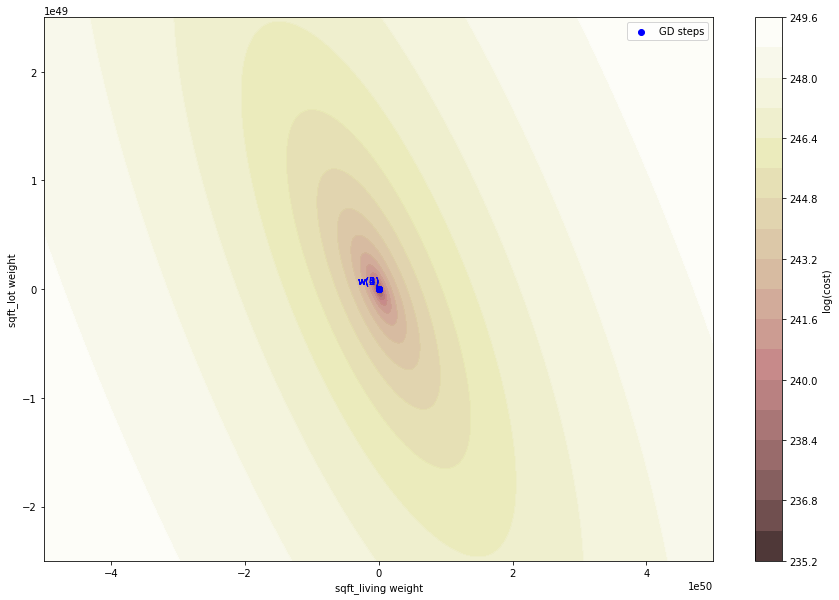

In [15]:
X = house_df[['sqft_living', 'sqft_lot']].values.reshape(-1, 2)[:100]
y = house_df.price.values.reshape(-1,1)[:100]

nb_of_bs = 500
b1 = np.linspace(-5e50, 5e50, num=nb_of_bs)
b2 = np.linspace(-0.25e50, 0.25e50, num=nb_of_bs)
b_x, b_y = np.meshgrid(b1, b2)
cost_arr_2d = np.zeros((nb_of_bs, nb_of_bs))

for i in range(nb_of_bs):
    for j in range(nb_of_bs):
        cost_arr_2d[i,j] = cost(predict(np.array([[b_x[i,j]], [b_y[i,j]]]), X) , y)

plt.figure(figsize=(15, 10)) 
plt.contourf(b_x, b_y, np.log(cost_arr_2d), 20, alpha=0.9, cmap=cm.pink)
cbar = plt.colorbar()        

b = np.array([[3.], [1.]])
lr = 0.2
gradients = np.array(gradient_descent(b, X, y, lr, 5))

labels = ['w(0)', 'w(1)', 'w(2)', 'w(3)', 'w(4)', 'w(5)']

plt.plot(gradients[:, 0], gradients[:, 1], c='b')
plt.scatter(gradients[:, 0], gradients[:, 1], label='GD steps', c='b')

for i, txt in enumerate(labels):
    plt.annotate(txt, (gradients[:, 0][i], gradients[:, 1][i]), 
                 xycoords='data', xytext=(-10, 3), 
                 textcoords='offset points', 
                 ha="center", va="bottom", 
                 color="blue")
    
cbar.ax.set_ylabel('log(cost)')
plt.xlabel("sqft_living weight")
plt.ylabel("sqft_lot weight")
plt.legend()

print("6 first steps of gradient descent method\n" ,gradients.reshape(-1, 2))

### Comment
The problem with large data is that when combined with small values, they generate huge errors. Here we see that in order to see the graph, a wide range had to be entered. The problem in this situation is also the starting vector, which in our case falls inside the smallest gradient.